### Ejercicio 1.11

Creado por: María Alejandra Perpiñán Barrios

Aquí hay un experimento que ilustra la diferencia entre un solo contenedor y varios contenedores. Ejecute una simulación para lanzar 1000 monedas justas. Lanza cada moneda de forma independiente 10 veces. Centrémonos en 3 monedas de la siguiente manera: $c_1$ es la primera moneda lanzada; $c_{\text {rand }}$ es una moneda que eliges al azar; $c_{\min }$ es la moneda que tuvo la frecuencia mínima de caras (elija la anterior en caso de empate). Sean $\nu_1, \nu_{\text {rand }}$ y $\nu_{\min }$ la fracción de caras que obtienes por las tres monedas respectivas.

**a.** ¿Cuál es $\mu$ para las tres monedas seleccionadas?

In [4]:
import numpy as np

def simulate_coin_flips(num_coins, num_flips):
    
    flips = np.random.binomial(1, 0.5, size=(num_coins, num_flips))
    v1 = flips[0].mean()
    v_rand = flips[np.random.randint(num_coins)].mean()
    v_min = flips.min(axis=0).mean()

    return v1, v_rand, v_min

In [5]:
# Establezco la semilla para la aleatorización
np.random.seed(42)

# Ejecución de la simulación
num_coins = 1000
num_flips = 10
v1, v_rand, v_min = simulate_coin_flips(num_coins, num_flips)

# Mostrar los resultados
print("v1:", v1)
print("v_rand:", v_rand)
print("v_min:", v_min)

v1: 0.6
v_rand: 0.6
v_min: 0.0


**b.** Repita todo este experimento una gran cantidad de veces (por ejemplo, 100 000 ejecuciones del experimento completo) para obtener varias instancias de $\nu_1, \nu_{\text {rand }}$ y $\nu_{\min }$ y graficar los histogramas de las distribuciones de $\nu_1, \nu_{\text {rand }}$ y $\nu_{\min }$. Tener en cuenta que las monedas que terminan siendo $c_{\text {rand }}$ y $c_{\min }$ pueden diferir de una lanzada a otra.

In [6]:
# Se agraga una parte al codigo del ejercicio a
def simulate_coin_flips(num_coins, num_flips, num_runs):
    
    # vectores para guardar los resultados
    v1_values = []
    v_rand_values = []
    v_min_values = []

    for i in range(num_runs):
        flips = np.random.binomial(1, 0.5, size=(num_coins, num_flips))

        v1 = flips[0].mean()
        v_rand = flips[np.random.randint(num_coins)].mean()
        v_min = flips.min(axis=0).mean()

        v1_values.append(v1)
        v_rand_values.append(v_rand)
        v_min_values.append(v_min)

    return v1_values, v_rand_values, v_min_values

In [32]:
%%time
# Establezco la semilla para la aleatorización
np.random.seed(42)

# Ejecución del experimento multiples veces
num_coins = 1000
num_flips = 10
num_runs = 100000
v1_values, v_rand_values, v_min_values = simulate_coin_flips(num_coins, num_flips, num_runs)

CPU times: total: 18.4 s
Wall time: 21 s


Text(0.5, 1.0, 'Histograma de v_min')

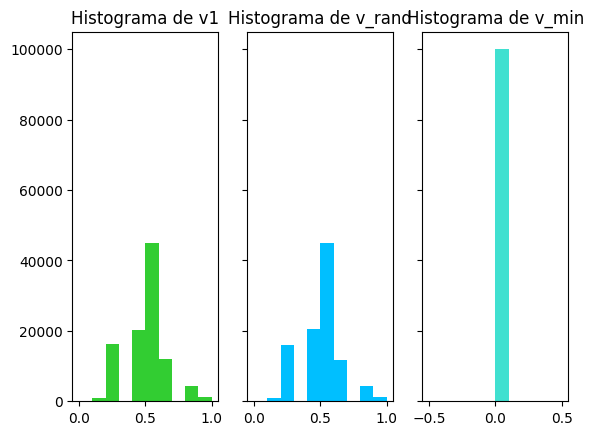

In [24]:
fig, axs = plt.subplots(1,3,sharey=True)
n_bins = 10
axs[0].hist(v1_values,bins=n_bins,color='limegreen')
axs[0].set_title('Histograma de v1')

axs[1].hist(v_rand_values,bins=n_bins,color='deepskyblue')
axs[1].set_title('Histograma de v_rand')

axs[2].hist(v_min_values,bins=n_bins,color='turquoise')
axs[2].set_title('Histograma de v_min')

**c.** Usando b, graficar estimaciones para $\mathbb{P}[|\nu-\mu|>\epsilon$ como una función de $\epsilon$, junto con el límite de Hoeffding $2 e^{-2 \epsilon^2 N}$ (en el mismo gráfico).

In [34]:
# Calculo de las diferencias absolutas |v - μ|
v1_values, v_rand_values, v_min_values = np.array(v1_values), np.array(v_rand_values), np.array(v_min_values)
abs_diff_v1 = np.abs(v1_values - 0.5)
abs_diff_v_rand = np.abs(v_rand_values - 0.5)
abs_diff_v_min = np.abs(v_min_values - 0.5)

In [36]:
# Calculo de estimaciones para P[|v - μ| > ε]
epsilon_values = np.linspace(0, 0.5, 100)
prob_v1 = np.mean(np.abs(abs_diff_v1[:, np.newaxis]) > epsilon_values, axis=0)
prob_v_rand = np.mean(np.abs(abs_diff_v_rand[:, np.newaxis]) > epsilon_values, axis=0)
prob_v_min = np.mean(np.abs(abs_diff_v_min[:, np.newaxis]) > epsilon_values, axis=0)

# Calculo del limite de Hoeffding
hoeffding_bound = 2 * np.exp(-2 * epsilon_values**2 * num_flips)

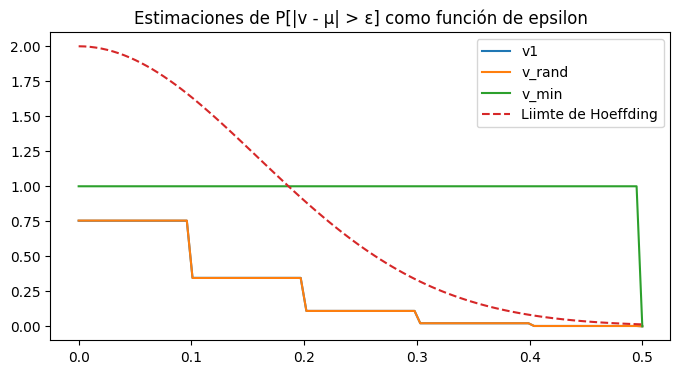

In [42]:
# Grafica de las estimaciones y el limite de Hoeffding
plt.figure(figsize=(8, 4))
plt.plot(epsilon_values, prob_v1, label='v1')
plt.plot(epsilon_values, prob_v_rand, label='v_rand')
plt.plot(epsilon_values, prob_v_min, label='v_min')
plt.plot(epsilon_values, hoeffding_bound, label='Liimte de Hoeffding', linestyle='--')


plt.title('Estimaciones de P[|v - μ| > ε] como función de epsilon')
plt.legend()
plt.show()

**d.** ¿Qué monedas obedecen el límite de Hoeffding y cuáles no? Explicar por qué. 
Mirando el gráfico, podemos observar lo siguiente:

- moneda_v1: La gráfica para v1 muestra que la probabilidad estimada disminuye a medida que aumenta $\epsilon$. Esto significa que es poco probable que las desviaciones de la verdadera media para v1 sean grandes y esto obedece al límite de Hoeffding.

- moneda v_rand: el gráfico de v_rand también muestra una tendencia decreciente a medida que aumenta $\epsilon$, lo que indica que es poco probable que las desviaciones de la media real de v_rand sean grandes. Por lo tanto, v_rand también obedece el límite de Hoeffding.

- moneda v_min: el gráfico de v_min exhibe un comportamiento diferente, muestra que la probabilidad estimada aumenta a medida que aumenta $\epsilon$. Esto sugiere que existe una mayor probabilidad de observar desviaciones de la media real que sean mayores que $\epsilon$. Por lo tanto, v_min no obedece el límite de Hoeffding. El motivo es que v_min se selecciona en función de la moneda con la frecuencia mínima de caras. Aunque se espera que la frecuencia mínima esté cerca de la media real, no se garantiza que sea la mejor aproximación de $\mu$. En consecuencia, existe una mayor probabilidad de mayores desviaciones de $\mu$ a medida que aumenta $\epsilon$.